# Consumer Preferences and Insights for Pet Care Wearables

#### Import Libraries

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [99]:
data = pd.read_csv("Form Responses.csv")

In [100]:
data.shape

(59, 31)

In [101]:
data.head()

,Timestamp,Age,gender,No. of pets,pet,5. How important are health tracking features in a pet care device?,6. Which feature excites you the most in a pet care wearable?,"7. Would you use a pet care device that integrates with smart home devices (e.g., cameras, feeders)?","8. Is tracking your pet’s behavior (e.g., stress signs, unusual activity) important to you?",9. Which of these health insights would be most useful to you? (Choose up to 2),...,21. Where do you usually sniff out the best pet products?,22. How likely are you to purchase a pet care device online?,23. Would you like the option to try the product in-store before buying?,24. Would free shipping influence your decision to buy the product online?,25. What would make shopping for pet care products more convenient for you?,26. Where do you discover paw-some new products for your pets?,27. What type of promotions would encourage you to buy this product?,28. How important are customer reviews when deciding to purchase a pet care product?,29. What type of marketing or promotions catch your attention when buying pet products?,30. Would you attend a live demo of this product at a pet care event?
0,11/17/2024 17:32:29,Below 20,Male,None – I don’t own pets (Please share why: ___...,NaN,Very Important,GPS tracking (real-time location updates),Definitely!,Yes,Early illness detection,...,"Online retailers (e.g., Amazon, Flipkart)",Likely,Yes,No,Showcasing the imporatnce and features of the ...,"Social media (e.g., Instagram, Facebook)",Free trials,Important,Online marketing,No
1,11/17/2024 17:32:52,21–30,Male,2,Fish,Very Important,Smart home compatibility,Definitely!,Yes,"Early illness detection, Activity level tracking",...,Veterinary clinics,Neutral,Yes,Maybe,food,Pet care websites,Discounts,Very Important,do know,Yes
2,11/17/2024 17:33:52,Below 20,Female,1,Dog(s),Very Important,AI-driven health recommendations,Definitely!,Yes,"Early illness detection, Nutrition recommendat...",...,"Online retailers (e.g., Amazon, Flipkart)",Likely,Yes,Yes,.,Word of mouth,"Bundle offers (e.g., with pet food)",Important,.,Yes
3,11/17/2024 17:34:17,Below 20,Male,3 or more,Rabbit,Important,AI-driven health recommendations,"Maybe, depending on the features.",Maybe,"Early illness detection, Nutrition recommendat...",...,Pet specialty stores,Likely,Maybe,Maybe,..,Pet care websites,"Bundle offers (e.g., with pet food)",Important,..,Maybe
4,11/17/2024 17:35:11,Below 20,Male,1,Dog(s),Important,GPS tracking (real-time location updates),"Maybe, depending on the features.",Yes,"Early illness detection, Activity level tracking",...,Pet specialty stores,Neutral,Yes,No,.,"Social media (e.g., Instagram, Facebook)",Discounts,Very Important,.,No


#### Data Loading and Preparation
The required libraries, including pandas, seaborn, matplotlib, and nltk, are imported. The dataset is loaded from a CSV file and checked for its shape and initial rows using data.shape and data.head(). Unnecessary columns, such as 'Timestamp', are dropped, and any duplicate rows are removed to clean the data.

In [102]:
data = data.drop(columns=['Timestamp'])

In [103]:
data.head()

,Age,gender,No. of pets,pet,5. How important are health tracking features in a pet care device?,6. Which feature excites you the most in a pet care wearable?,"7. Would you use a pet care device that integrates with smart home devices (e.g., cameras, feeders)?","8. Is tracking your pet’s behavior (e.g., stress signs, unusual activity) important to you?",9. Which of these health insights would be most useful to you? (Choose up to 2),10. What kind of health information would be most useful for understanding your pet’s well-being?,...,21. Where do you usually sniff out the best pet products?,22. How likely are you to purchase a pet care device online?,23. Would you like the option to try the product in-store before buying?,24. Would free shipping influence your decision to buy the product online?,25. What would make shopping for pet care products more convenient for you?,26. Where do you discover paw-some new products for your pets?,27. What type of promotions would encourage you to buy this product?,28. How important are customer reviews when deciding to purchase a pet care product?,29. What type of marketing or promotions catch your attention when buying pet products?,30. Would you attend a live demo of this product at a pet care event?
0,Below 20,Male,None – I don’t own pets (Please share why: ___...,NaN,Very Important,GPS tracking (real-time location updates),Definitely!,Yes,Early illness detection,Body temperature,...,"Online retailers (e.g., Amazon, Flipkart)",Likely,Yes,No,Showcasing the imporatnce and features of the ...,"Social media (e.g., Instagram, Facebook)",Free trials,Important,Online marketing,No
1,21–30,Male,2,Fish,Very Important,Smart home compatibility,Definitely!,Yes,"Early illness detection, Activity level tracking",all kind,...,Veterinary clinics,Neutral,Yes,Maybe,food,Pet care websites,Discounts,Very Important,do know,Yes
2,Below 20,Female,1,Dog(s),Very Important,AI-driven health recommendations,Definitely!,Yes,"Early illness detection, Nutrition recommendat...",.,...,"Online retailers (e.g., Amazon, Flipkart)",Likely,Yes,Yes,.,Word of mouth,"Bundle offers (e.g., with pet food)",Important,.,Yes
3,Below 20,Male,3 or more,Rabbit,Important,AI-driven health recommendations,"Maybe, depending on the features.",Maybe,"Early illness detection, Nutrition recommendat...",..,...,Pet specialty stores,Likely,Maybe,Maybe,..,Pet care websites,"Bundle offers (e.g., with pet food)",Important,..,Maybe
4,Below 20,Male,1,Dog(s),Important,GPS tracking (real-time location updates),"Maybe, depending on the features.",Yes,"Early illness detection, Activity level tracking",.,...,Pet specialty stores,Neutral,Yes,No,.,"Social media (e.g., Instagram, Facebook)",Discounts,Very Important,.,No


In [104]:
data.shape

(59, 30)

In [105]:
data.drop_duplicates(inplace=True)

In [106]:
data.shape

(59, 30)

#### Age Distribution Analysis
A histogram is plotted to visualize the age distribution of respondents, using 10 bins and a Kernel Density Estimate (KDE) overlay. This helps in understanding the age demographics of the sample group.

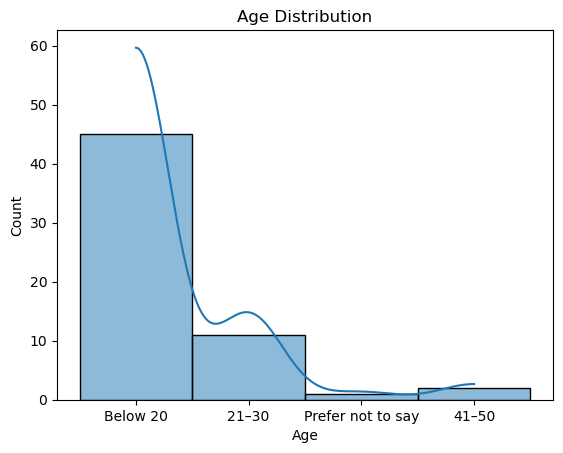

In [107]:
sns.histplot(data['Age'],bins=10,kde=True)
plt.title('Age Distribution')
plt.show()

#### Preferred Promotion Strategy
The data in the 'Where do you discover paw-some new products for your pets?' column is cleaned by standardizing responses. A count plot is then used to visualize the preferred promotion strategy, with customized colors for better clarity.

In [108]:
data['26. Where do you discover paw-some new products for your pets?']=data['26. Where do you discover paw-some new products for your pets?'].replace('Social media (e.g., Instagram, Facebook)','Social Media')

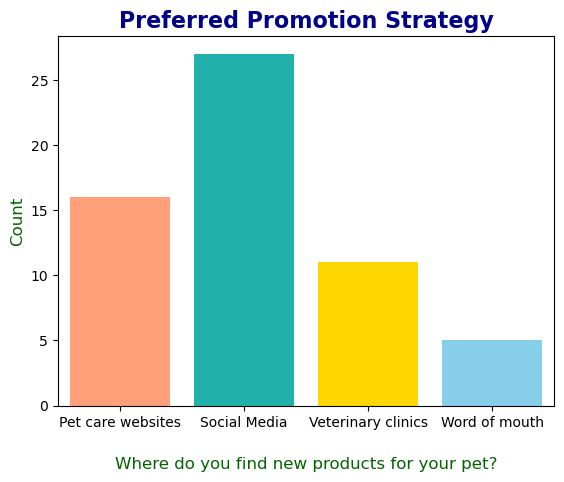

In [224]:
ax = sns.countplot(x='26. Where do you discover paw-some new products for your pets?', 
                   data=data)

for i, patch in enumerate(ax.patches):
    patch.set_facecolor(palette[i % len(palette)])

plt.title("Preferred Promotion Strategy", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Where do you find new products for your pet?', labelpad=20, fontsize=12, color='darkgreen')
plt.ylabel('Count', fontsize=12, color='darkgreen')
plt.show()

#### Willingness to Pay by Age Group
The data is sorted based on the price range considered reasonable for a basic pet care wearable. A boxplot is generated to show the willingness to pay across different age groups, with age-based color differentiation to highlight trends.

In [230]:
data=data.sort_values('14. What price range would you consider reasonable for a basic pet care wearable?')
data['14. What price range would you consider reasonable for a basic pet care wearable?']=data['14. What price range would you consider reasonable for a basic pet care wearable?'].replace('Over ₹9000','₹9000 and over')

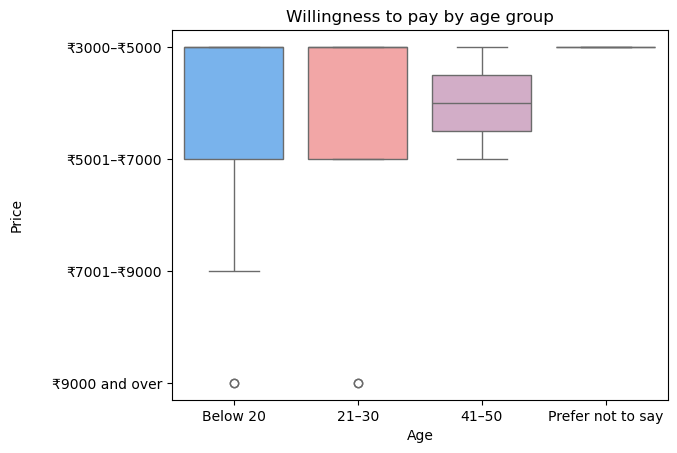

In [284]:
palette = ["#66b3ff", "#ff9999", "#D8A7CA", "#e6f2ff"]

sns.boxplot(x='Age',y='14. What price range would you consider reasonable for a basic pet care wearable?',data=data,hue='Age',palette=palette)
plt.title("Willingness to pay by age group")
plt.ylabel('Price',labelpad=20)
plt.show()

#### Preferred Buying Location
A pie chart is used to display the distribution of preferred buying locations for pet products. The chart is color-coded to reflect the different buying locations and their respective percentage shares.

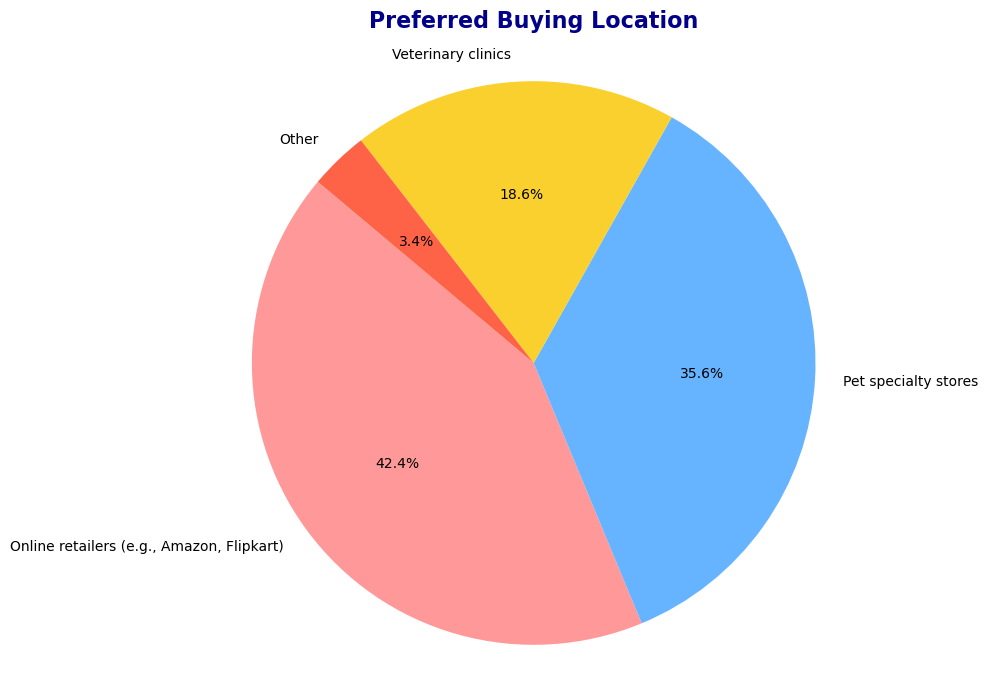

In [312]:
buying_location_counts = data['21. Where do you usually sniff out the best pet products?'].value_counts()
labels = buying_location_counts.index 
sizes = buying_location_counts.values

colors = ['#ff9999', '#66b3ff', '#FAD02E', '#FF6347', '#98C2D6']  

plt.figure(figsize=(8, 8)) 
plt.pie(sizes, colors=colors,labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Buying Location', fontsize=16, fontweight='bold', color='darkblue',pad=20)
plt.ylabel("")
plt.axis('equal')
plt.show()


#### Feature Preference by Gender
A heatmap is created to visualize the preference for various features in pet care wearables, segmented by gender. This analysis provides insights into which features are most popular among different genders.

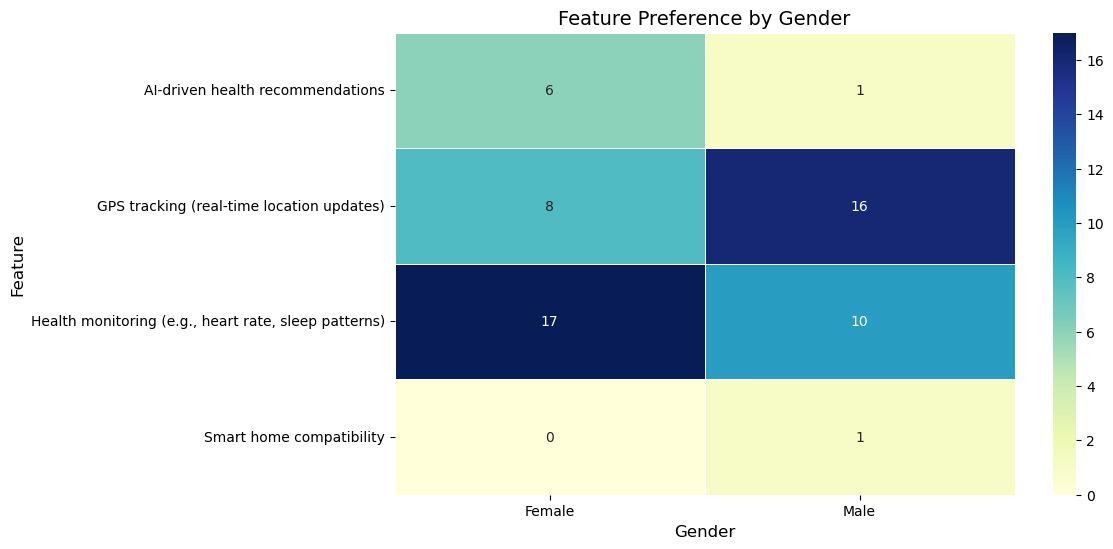

In [113]:
heatmap_data = pd.crosstab(
    data['6. Which feature excites you the most in a pet care wearable?'],
    data['gender']
)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title('Feature Preference by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()

#### WordCloud of Desired Features
A WordCloud is generated from responses about desired features in pet care products. Common words are highlighted, and stopwords are filtered out to give a clear representation of the most mentioned features. The WordCloud helps identify key consumer desires for product development.

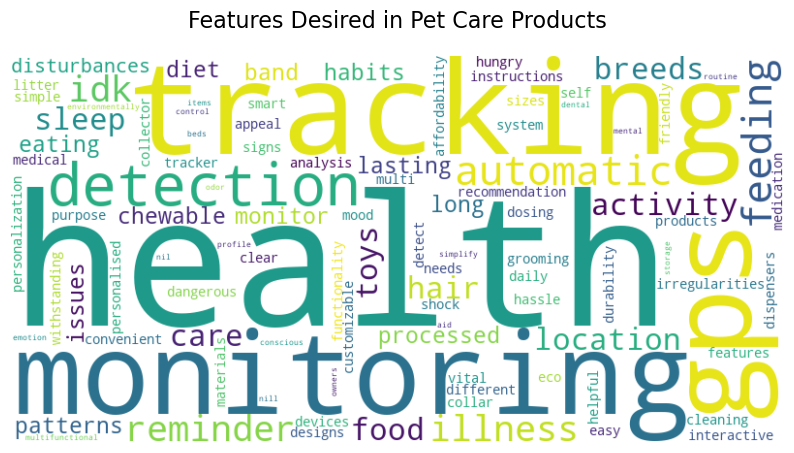

In [214]:
from wordcloud import WordCloud, STOPWORDS
column_name='13. What features do you wish pet care products had to make your life as a pet owner easier? '
text_data = " ".join(data[column_name].dropna().str.lower())

stopwords = set(STOPWORDS)
stopwords.update(["like", "maybe", "something", "smth", "know", "track", "options", "use", "boxes", "already", "key", "dog","pets","rem", "related", "based", "wear", "mentioned", "less", "always","stick","pet"])

wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=100
).generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title("Features Desired in Pet Care Products", fontsize=16,pad=20)
plt.show()